In [104]:
# Import libraries
import pandas as pd
import numpy as np
from scipy import stats
import math, random
from matplotlib import pyplot as plt, gridspec
import seaborn as sns
import statsmodels.api as sm
import itertools

%matplotlib inline

# Chapter 9 - Relations

## Formulas

Linear relation between two continuous variables:

$$ y = \alpha + \beta x$$

This is the population relation. The sample relation is given by:

$$\bar{y} = a+b\bar{x}$$

**Residuals**

For bivariate data the residual can be defined as:
$$z_i = y_i - (a+bx_i)$$

**Least-squares Line**

The least-squares line is the line that minimises the sum of the squares of the residuals with parameters:

$$b = \frac{\sum(x_i-\bar{x})(y_i-\bar{y})}{\sum(x_i-\bar{x})^2}$$

and

$$a = \bar{y} - b\bar{x}$$

**Correlation coefficient**

$$r = \frac{\sum(x_i - \bar{x})(y_i-\bar{y})}{\sqrt{\sum(x_i-\bar{x})^2\sum(y_i-\bar{y})^2}}$$

**Goodnes of fit statistic**

$$r^2 = 1-\frac{\sum(y_i-\hat{y_i})^2}{\sum(y_i-\hat{y})^2}$$

**Error**

Error between a response $y_i$ and the predicted response using the population fitted line at $\alpha + \beta x_i$:

$$\epsilon_i = y_i - (\alpha + \beta x_i)$$

This is the population error and cannot be calculated

**Standard Error of $b$**

$$SE_b = \frac{\sigma}{\sqrt{\sum(x_i-\bar{x})^2}}=\frac{\sigma}{s_x\sqrt{n-1}}$$

where $\sigma$ is the standard deviation of the distribution of the error and $s_x$ is the sample standard deviation of the $x$ values.

$\sigma$ is usually unknown so the standard deviation of the sample can be used to estimate it

$$s = \sqrt{\frac{\sum(y_i-\hat{y}_i)^2}{n-2}}$$

so the standard error can be calculated using

$$s_b=\frac{s}{s_x\sqrt{n-1}}$$

**Confidence interval**

$$(b-t_{n-2}S_b,b+t_{n-2}S_b)$$

where $t_v$ is the t-distribution with $v$ degrees of freedom corresponding to a two-tailed area of 0.05

**Test statistic**

$$t = \frac{b}{s_b}$$
With degrees of freedom equal to $n-2$

The test statistic tests whether there is a relation between the variables by testing whether $\beta=0$. If $\beta=0$ then there is no correlation between the variables so:
$$H_0: \beta = 0$$
$$H_1: \beta \ne 0$$

## Notes

In this example we will build the scatter plot, least squares line, and confidence interval for an experiment of car speed vs consumption.

In [50]:
names = 'Dylia Ennjy Cerub Thoroyd Heung-See Ethik Ixe Ghon KC Hanora Mothas Ekhui Mahilah Snorly jaK'.split(' ')
values = np.array([[51, 20], [55, 22], [60, 19], [61, 24], [64, 15], [69, 23], [74, 20], [80, 17], [85, 25], [90, 19],
         [94, 28], [98, 25], [105, 21], [115, 27], [120, 30]])

df = pd.DataFrame(values,index=names,columns=['speed','consumption'])
df['constant']=1. # Added for linear regression intercept
df

,speed,consumption,constant
Dylia,51,20,1.0
Ennjy,55,22,1.0
Cerub,60,19,1.0
Thoroyd,61,24,1.0
Heung-See,64,15,1.0
Ethik,69,23,1.0
Ixe,74,20,1.0
Ghon,80,17,1.0
KC,85,25,1.0
Hanora,90,19,1.0


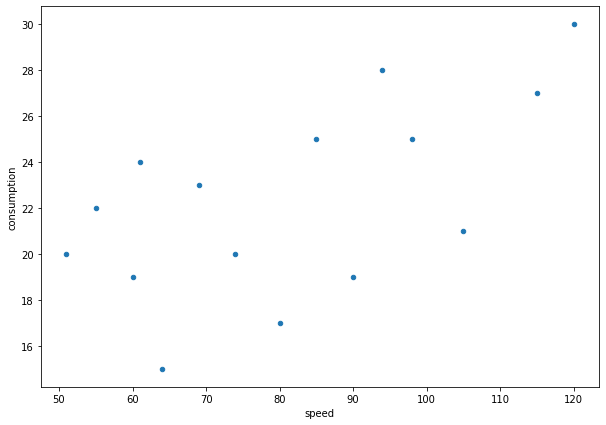

In [66]:
# Scatter plot
df[['speed','consumption']].plot(kind='scatter',x='speed',y='consumption',figsize=(10,7))

In [75]:
# Linear model
lm = sm.OLS(df['consumption'],df[['constant','speed']]).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            consumption   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     7.501
Date:                Fri, 22 May 2020   Prob (F-statistic):             0.0169
Time:                        21:15:05   Log-Likelihood:                -38.888
No. Observations:                  15   AIC:                             81.78
Df Residuals:                      13   BIC:                             83.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant      12.8770      3.567      3.610      0.003       5.170      20.584
speed          0.1162      0.042      2.739      0.017       0.025       0.208
==============================================================================
Omnibus:                        2.679   Durbin-Watson:                   2.828
Prob(Omnibus):                  0.262   Jarque-Bera (JB):                1.414
Skew:                          -0.444   Prob(JB):                        0.493
Kurtosis:                       1.786   Cond. No.                         335.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
lm.params

constant    12.876969
speed        0.116172
dtype: float64

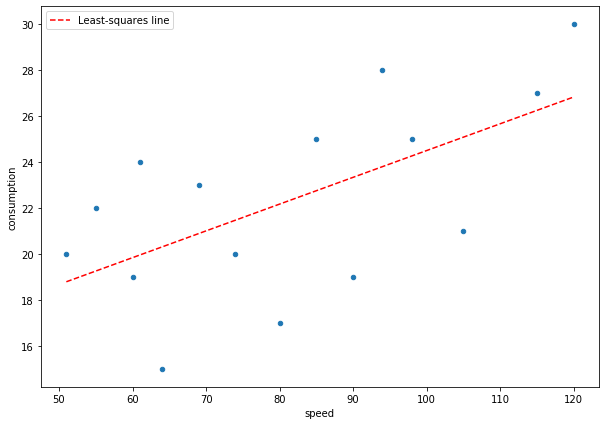

In [86]:
# Scatter plot with least-squares line

x = np.linspace(df['speed'].min(),df['speed'].max())
y = lm.params['speed']*x + lm.params['constant']

df[['speed','consumption']].plot(kind='scatter',x='speed',y='consumption',figsize=(10,7))
plt.plot(x,y,color='r',ls='--',label='Least-squares line')
plt.legend()

**Calculating the confidence interval for $\beta$**

$(b-t_{n-2}s_b,b+t_{n-2}s_b)$

where $t_v$ is the t-distribution with $v$ degrees of freedom corresponding to a two-tailed area of 0.05

$s_b=\frac{s}{s_x\sqrt{n-1}}$

$s = \sqrt{\frac{\sum(y_i-\hat{y}_i)^2}{n-2}}$


$s_x$ is the standard deviation for the independent variable

In [111]:
s = math.sqrt(lm.scale) # Std of sample of residuals
sx = df['speed'].std(ddof=1) # Std of independent variable
sb = s/(sx*math.sqrt(df.shape[0]-1)) # Standard error
deg_free = df.shape[0]-2 # Degrees of freedom
t = abs(stats.t.ppf(.05/2,df=deg_free)) # T statistic


print(f'Independent variable standard deviation = {sx}')
print(f'Standard deviation of sample of residuals = {s}')
print(f'Standard error = {sb}')
print(f'Degrees of freedom = {deg_free}')
print(f'T stat = {t}')
print('\nConfidence Interval')
print(f"({lm.params['speed']-t*sb:.3f},{lm.params['speed']+t*sb:.3f})")

Independent variable standard deviation = 21.885415887559198
Standard deviation of sample of residuals = 3.473367791250958
Standard error = 0.042416218831648395
Degrees of freedom = 13
T stat = 2.160368656461013

Confidence Interval
(0.025,0.208)


To test whether there is a correlation between the variables we'll use test statistic:

$t = \frac{b}{s_b}$ with $n-2$ degrees of freedom

In [117]:
t = lm.params['speed']/sb
p_value = stats.t.sf(t,df=deg_free)*2

print(f't = {t:.4f}, p value = {p_value:.4f}')

t = 2.7388, p value = 0.0169


**Testing model assumptions**

1. The relation between $x$ and $y$ in the population is _linear_: No pattern should be found as this would indicate a departure from linearity
2. The standard deviation of the distribution of errors is _constant_, that is, it does not depend on $x$: the distribution should be homeoscedastic 
3. The distribution of the errors is normal

Text(0.5, 0, 'Fitted Values')

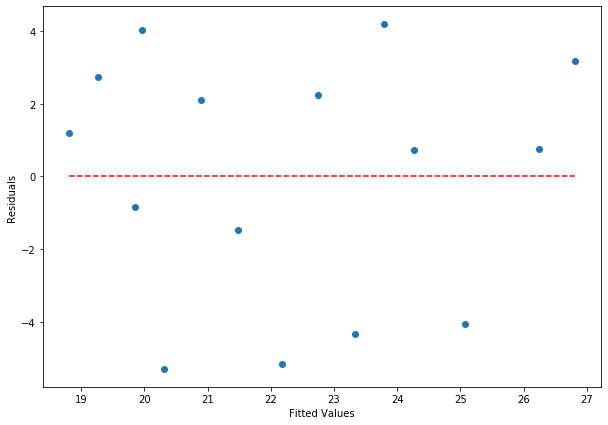

In [135]:
# Testing assumptions 1 and 2
fitted_values = df.speed*lm.params['speed'] + lm.params['constant']
residuals = df.consumption - fitted_values

plt.figure(figsize=(10,7))
plt.scatter(fitted_values,residuals)
plt.hlines(y=0,xmin=fitted_values.min(),xmax=fitted_values.max(),color='red',ls='--')
plt.ylabel('Residuals')
plt.xlabel('Fitted Values')

We can see from this plot that there is no pattern in the distribution of residuals neither change in variance with change in Fitted Values

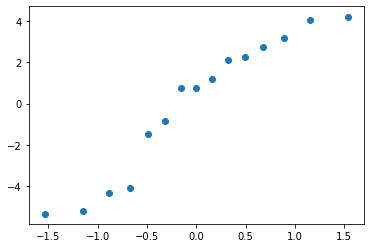

In [145]:
# Testing assumption 3
values = residuals.to_numpy()
values.sort()
scores = stats.norm.ppf(np.arange(1,values.shape[0]+1,1)/(values.shape[0]+1))

plt.scatter(scores,values)

Normality assumption is met

## Homework

### Problem 1

 (Taken from Utts, 1996, page 178) A professor sampled eight hardcover books from his shelf and recorded the number of pages and the price of each book, as follows: 
 
 pages: 104 188 220 264 342 417 458 466 <br>
 price: 32.95 24.95 49.95 79.95 49.95 39.75 60.00 49.95
 
Is there a relation between the number of pages and the price of a book? 

Answer this question by plotting the data as a scatter plot, fitting the regression line, and testing the appropriate null hypothesis. Interpret your findings. Use your fitted relation to predict the price of a hardcover book with 200 pages. 

In [4]:
# Data
df = pd.DataFrame({'pages':[float(i) for i in '104 188 220 264 342 417 458 466'.split(' ')],
                   'price':[float(i) for i in '32.95 24.95 49.95 79.95 49.95 39.75 60.00 49.95'.split(' ')]})
df['constant']=1.0
df

,pages,price,constant
0,104.0,32.95,1.0
1,188.0,24.95,1.0
2,220.0,49.95,1.0
3,264.0,79.95,1.0
4,342.0,49.95,1.0
5,417.0,39.75,1.0
6,458.0,60.00,1.0
7,466.0,49.95,1.0


In [5]:
lm = sm.OLS(df['price'],df[['constant','pages']]).fit()
x = np.linspace(df['pages'].min(),df['pages'].max())
y = x*lm.params['price'] + lm.params['constant']
lm.summary()

/home/adgb/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                 -0.025
Method:                 Least Squares   F-statistic:                    0.8290
Date:                Sat, 23 May 2020   Prob (F-statistic):              0.398
Time:                        07:28:18   Log-Likelihood:                -32.921
No. Observations:                   8   AIC:                             69.84
Df Residuals:                       6   BIC:                             70.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant      34.9468     15.998      2.184      0.072      -4.200      74.093
pages          0.0439      0.048      0.911      0.398      -0.074       0.162
==============================================================================
Omnibus:                        5.947   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                1.736
Skew:                           1.099   Prob(JB):                        0.420
Kurtosis:                       3.614   Cond. No.                         878.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

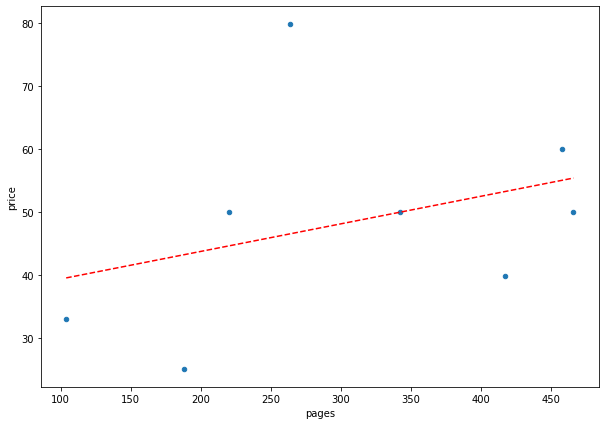

In [10]:
# Plotting scatter plot with fitted least-squares line
x = np.linspace(df['pages'].min(),df['pages'].max())
y = x*lm.params['pages'] + lm.params['constant']

df.plot(kind='scatter',x='pages',y='price',figsize=(10,7))
plt.plot(x,y,color='r',ls='--')

Calculating the confidence interval

$(b-t_{n-2}s_b,b+t_{n-2}s_b)$

where

$b$ = estimation point for $\beta$

$s_b = \frac{s}{s_x\sqrt{n-1}}$ = standard error of $b$

where

$s_x$ = standard deviation of $x$

$s = \sqrt{\frac{\sum(y_i-\hat{y})^2}{n-2}}$

In [14]:
# Confidence interval for beta
b = lm.params['pages']
deg_fr = df.shape[0]-2
t = abs(stats.t.ppf(.05/2,df=deg_fr))
s = math.sqrt(lm.scale)
sx = df['pages'].std(ddof=1)
sb = s/(sx*math.sqrt(df.shape[0]-1))

print(f'Condfidence interval = ({lm.params["pages"]-t*sb},{lm.params["pages"]+t*sb})')

Condfidence interval = (-0.07402602272633672,0.1617657208693727)


In [15]:
# Testing the null hypothesis
t = lm.params['pages']/sb
p_value = stats.t.sf(abs(t),df=deg_fr)*2
t,p_value

(0.9105124026891787, 0.39765449203635805)

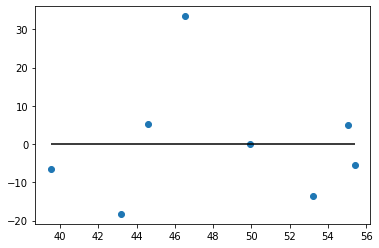

In [34]:
# Checking assumptions
fitted_values = df['pages']*lm.params['pages']+lm.params['constant']

plt.scatter(fitted_values, lm.resid)
plt.hlines(y=0,xmin=fitted_values.min(),xmax=fitted_values.max())

values = np.concatenate([df['pages'],df['price']])
values.sort()
scores = stats.norm.ppf(np.arange(1,values.shape[0]+1,1)/(values.shape[0]+1))

plt.scatter(scores,values)

In [48]:
# Predicting price of a hardcover book with 200 pages
lm.params['pages']*200 + lm.params['constant'], lm.predict([[1.0,200]])

(43.720724955945755, array([43.72072496]))

### Problem 2

Age, gender, and smoking specific term life premium rates offered by the NRMA Insurance Company in 1985, for a sum insured of $50,000, are as follows (source: The Open Road magazine, June 85). 

In [52]:
age = [float(i) for i in '34 36 38 40 42 44 46 48 50 52 54'.split(' ')]
male_smoker = [float(i) for i in '135 145 160 180 210 250 295 360 435 535 650'.split(' ')]
male_non_smoker = [float(i) for i in '105 110 115 125 140 155 180 215 260 315 390'.split(' ')]
female_smoker = [float(i) for i in '110 120 130 145 165 190 225 265 320 380 460'.split(' ')]
female_non_smoker = [float(i) for i in '95 100 105 115 130 145 165 195 230 275 335'.split(' ')]

df = pd.DataFrame({'age':age,'male_smoker':male_smoker,'male_non_smoker':male_non_smoker,
                   'female_smoker':female_smoker,'female_non_smoker':female_non_smoker,
                   'constant':np.ones(len(age))})
df

,age,male_smoker,male_non_smoker,female_smoker,female_non_smoker,constant
0,34.0,135.0,105.0,110.0,95.0,1.0
1,36.0,145.0,110.0,120.0,100.0,1.0
2,38.0,160.0,115.0,130.0,105.0,1.0
3,40.0,180.0,125.0,145.0,115.0,1.0
4,42.0,210.0,140.0,165.0,130.0,1.0
5,44.0,250.0,155.0,190.0,145.0,1.0
6,46.0,295.0,180.0,225.0,165.0,1.0
7,48.0,360.0,215.0,265.0,195.0,1.0
8,50.0,435.0,260.0,320.0,230.0,1.0
9,52.0,535.0,315.0,380.0,275.0,1.0


Choose one of these four categories (e.g. male non-smokers) and fit an appropriate linear model to predict premium from age. Does this model provide a reasonable fit to the data? Could you use the model to estimate the premium for a person aged 60? Explain. 

In [53]:
lm = sm.OLS(df['male_non_smoker'],df[['constant','age']]).fit()
lm.summary()

/home/adgb/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        male_non_smoker   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     57.54
Date:                Sat, 23 May 2020   Prob (F-statistic):           3.38e-05
Time:                        11:07:51   Log-Likelihood:                -54.061
No. Observations:                  11   AIC:                             112.1
Df Residuals:                       9   BIC:                             112.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant    -388.1818     77.249     -5.025      0.001    -562.932    -213.432
age           13.1818      1.738      7.585      0.000       9.251      17.113
==============================================================================
Omnibus:                        1.350   Durbin-Watson:                   0.422
Prob(Omnibus):                  0.509   Jarque-Bera (JB):                1.004
Skew:                           0.635   Prob(JB):                        0.605
Kurtosis:                       2.239   Cond. No.                         313.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

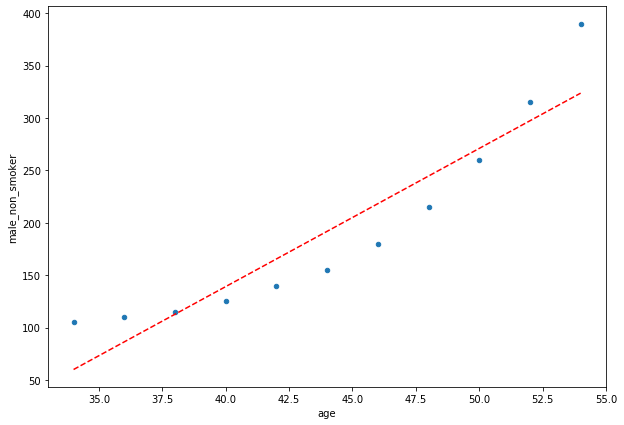

In [57]:
# Scatter plot with best fit line for male non smoker
x = np.linspace(df.age.min(), df.age.max())
y = x*lm.params['age'] + lm.params['constant']

df[['age','male_non_smoker']].plot(kind='scatter',x='age',y='male_non_smoker',figsize=(10,7))
plt.plot(x,y,color='r',ls='--')

$r^2$ shows the fit is reasonable. Given that the range of the data goes up to approx. 55yo, then we could not do predictions for people outside the range

### Problem 3

The following data, compiled by UNICEF in 1992, show the under 5 mortality rate (per 1000 live births) and the adult female literacy rate (percent) for 11 Middle Eastern countries (with two missing literacy rates). Use these data from the nine countries having complete data to fit a linear model, and then attempt to use this model to estimate the missing data. Do you this think this approach is accurate? 

In [68]:
country = 'Yemen SaudiArabia Iraq Syria Iran Lebanon Jordan Oman U.ArabEmirates Kuwait Israel'.split(' ')
child_mortality = [float(i) for i in '187 91 86 59 59 56 52 49 30 19 11'.split(' ')]
female_literacy = [float(i) for i in f'21 48 49 51 43 73 70 {np.nan} 38 67 {np.nan}'.split(' ')]

df = pd.DataFrame({'child_mortality':child_mortality,'female_literacy':female_literacy,
                   'constant':np.ones(len(country))},
                  index=country)
df

,child_mortality,female_literacy,constant
Yemen,187.0,21.0,1.0
SaudiArabia,91.0,48.0,1.0
Iraq,86.0,49.0,1.0
Syria,59.0,51.0,1.0
Iran,59.0,43.0,1.0
Lebanon,56.0,73.0,1.0
Jordan,52.0,70.0,1.0
Oman,49.0,NaN,1.0
U.ArabEmirates,30.0,38.0,1.0
Kuwait,19.0,67.0,1.0


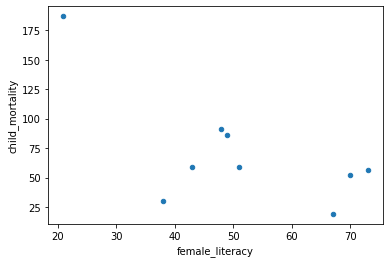

In [75]:
df[['child_mortality','female_literacy']].plot(kind='scatter',y='child_mortality',x='female_literacy')

In [76]:
df[df.child_mortality>175]

,child_mortality,female_literacy,constant
Yemen,187.0,21.0,1.0


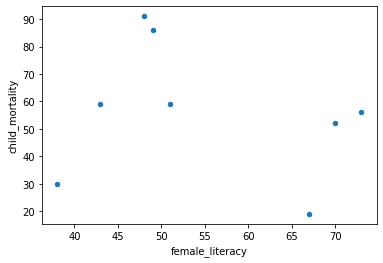

In [77]:
df.drop('Yemen')[['child_mortality','female_literacy']].plot(kind='scatter',y='child_mortality',x='female_literacy')

A linear model wouldn't be appropriate for this dataset. There is no linear relation between the variables. In addition, the independent variable (female literacy) cannot be estimated from the dependent varialbe (child mortality)

### Problem 4

Investigate the relation between body fat percentage and age 

a. for the two sexes combined, and <br>
b. for females only. 

Do you think it is reasonable to combine the data for the two sexes when investigating this relation? Explain. 

In [82]:
ages = np.array([23, 23, 27, 27, 39, 41, 45, 49, 50, 53, 53, 54, 56, 57, 58, 58, 60, 61])
bfp = np.array([9.51, 27.9, 7.81, 17.81, 31.4, 25.9, 27.41, 25.2, 31.1, 34.7, 42.0, 29.1, 32.5, 30.3, 33.0, 33.8, 41.1, 34.5])
gender = [1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0]

df = pd.DataFrame({'age':ages,'bfp':bfp,'gender':gender})
df

,age,bfp,gender
0,23,9.51,1
1,23,27.90,0
2,27,7.81,1
3,27,17.81,1
4,39,31.40,0
5,41,25.90,0
6,45,27.41,1
7,49,25.20,0
8,50,31.10,0
9,53,34.70,0


In [86]:
df['constant'] = 1.0

In [87]:
lm = sm.OLS(df['bfp'],df[['constant','age']]).fit()

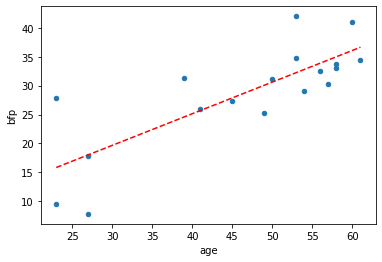

In [88]:
x = np.linspace(df.age.min(),df.age.max())
y = x*lm.params['age'] + lm.params['constant']

df[['age','bfp']].plot(kind='scatter',x='age',y='bfp')
plt.plot(x,y,color='r',ls='--')

In [123]:
print('ALL DATA')
print(f'- r squared = {lm.rsquared:.3f}')
print(f'- Best fit line = {lm.params["age"]:.3f}x + {lm.params["constant"]:.3f}')
print(f'- T statistic = {lm.tvalues["age"]:.3f}')
print(f'- p value = {lm.pvalues["age"]:.4f}')
print(f'- Confidence interval = ({lm.conf_int().loc["age",0]:.3f},{lm.conf_int().loc["age",1]:.3f})')

ALL DATA
- r squared = 0.627
- Best fit line = 0.548x + 3.233
- T statistic = 5.190
- p value = 0.0001
- Confidence interval = (0.324,0.772)


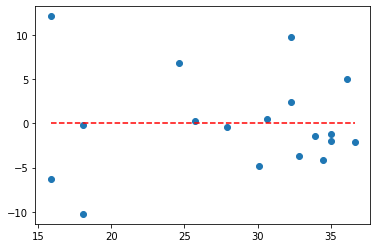

In [117]:
# Testing homeoscedasticity 
fitted_points = df.age*lm.params['age']+lm.params['constant']
plt.scatter(fitted_points,lm.resid)
plt.hlines(y=0,xmin=fitted_points.min(),xmax=fitted_points.max(),color='r',ls='--')

Variance seems to diminish with the $x$ axis

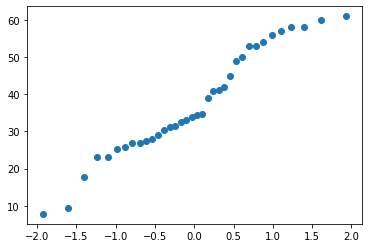

In [118]:
# Testing normality
values = np.concatenate([df.age,df.bfp])
values.sort()
scores = stats.norm.ppf(np.arange(1,values.shape[0]+1,1)/(values.shape[0]+1))

plt.scatter(scores,values)

Data does appear to be approximately normal

Females only

FEMALE ONLY DATA
- r squared = 0.257
- Best fit line = 0.240x + 20.112
- T statistic = 2.035
- p value = 0.0645
- Confidence interval = (-0.017,0.497)


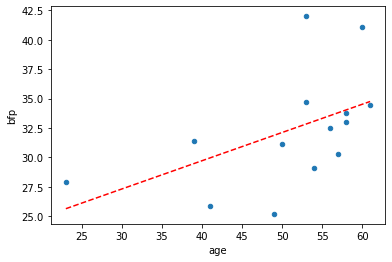

In [124]:
df = df[df.gender==0]

lm = sm.OLS(df['bfp'],df[['constant','age']]).fit()

x = np.linspace(df.age.min(),df.age.max())
y = x*lm.params['age'] + lm.params['constant']

df[['age','bfp']].plot(kind='scatter',x='age',y='bfp')
plt.plot(x,y,color='r',ls='--')

print('FEMALE ONLY DATA')
print(f'- r squared = {lm.rsquared:.3f}')
print(f'- Best fit line = {lm.params["age"]:.3f}x + {lm.params["constant"]:.3f}')
print(f'- T statistic = {lm.tvalues["age"]:.3f}')
print(f'- p value = {lm.pvalues["age"]:.4f}')
print(f'- Confidence interval = ({lm.conf_int().loc["age",0]:.3f},{lm.conf_int().loc["age",1]:.3f})')

When investingating female only there are two outliers that are skewing the data.

FEMALE ONLY DATA
- r squared = 0.318
- Best fit line = 0.167x + 22.459
- T statistic = 2.158
- p value = 0.0563
- Confidence interval = (-0.005,0.339)


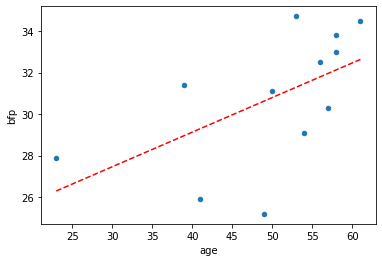

In [125]:
df = df[df.bfp<40]
lm = sm.OLS(df['bfp'],df[['constant','age']]).fit()

x = np.linspace(df.age.min(),df.age.max())
y = x*lm.params['age'] + lm.params['constant']

df[['age','bfp']].plot(kind='scatter',x='age',y='bfp')
plt.plot(x,y,color='r',ls='--')

print('FEMALE ONLY DATA')
print(f'- r squared = {lm.rsquared:.3f}')
print(f'- Best fit line = {lm.params["age"]:.3f}x + {lm.params["constant"]:.3f}')
print(f'- T statistic = {lm.tvalues["age"]:.3f}')
print(f'- p value = {lm.pvalues["age"]:.4f}')
print(f'- Confidence interval = ({lm.conf_int().loc["age",0]:.3f},{lm.conf_int().loc["age",1]:.3f})')

Removing the outliers sees a small improvement but we fail to reject the null hypothesis that $\beta=0$

### Problem 5

The following data (provided by Dr Eileen Gallery from Royal North Shore Hospital in Sydney) comprise the estimates of foetal weight (in grams) at successive visits by a pregnant woman to a clinic and the actual birth weight at 40 weeks. Fit a linear model to the data for the five visits, and compare the predicted value given by this model with the birth weight. Do you think it is possible, based on the model, to give a confidence interval for the birth weight? 

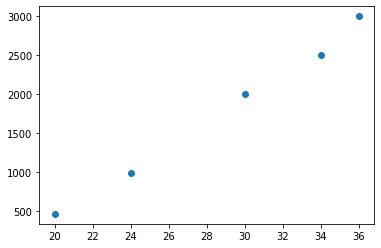

In [146]:
week = np.array([20,24,30,34,36])
grams = np.array([460,980,2000,2500,3000])
df = pd.DataFrame({'week':week,'grams':grams,'constant':np.ones(len(week))})

plt.scatter(week,grams)

In [147]:
lm = sm.OLS(df['grams'],df[['constant','week']]).fit()

In [148]:
lm.summary()

/home/adgb/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grams   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     555.3
Date:                Sun, 24 May 2020   Prob (F-statistic):           0.000167
Time:                        16:13:08   Log-Likelihood:                -28.269
No. Observations:                   5   AIC:                             60.54
Df Residuals:                       3   BIC:                             59.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant   -2711.6814    195.063    -13.902      0.001   -3332.458   -2090.904
week         156.2389      6.630     23.565      0.000     135.139     177.339
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.878
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.497
Skew:                          -0.262   Prob(JB):                        0.780
Kurtosis:                       1.547   Cond. No.                         144.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

It wouldn't be reasonable given that the value is outside the bounds of the data.

### Problem 6

An experiment was conducted by Atwell (1991) to determine factors that affect the growth of grain legumes. Varieties of lupins and peas were grown in the field for 43 days on a solonised brown soil. During the course of the study the following air-filled porosity percentages were recorded at various depths below the soil surface. 

In [192]:
data = np.array([[5,12,20,28,36],[23,19,15,17,31],
                 [25,17,14,14,13],[21,20,24,24,16],
                 [17,15,16,15,20],[1,1,1,1,1]]).T
df = pd.DataFrame(data,columns=['depth','d22','d29','d36','d43',
                                'constant'])
df

,depth,d22,d29,d36,d43,constant
0,5,23,25,21,17,1
1,12,19,17,20,15,1
2,20,15,14,24,16,1
3,28,17,14,24,15,1
4,36,31,13,16,20,1


 a. Draw a scatter plot of the data relating air-filled porosity at 43 days to the porosity at 22 days, and comment on its appearance.

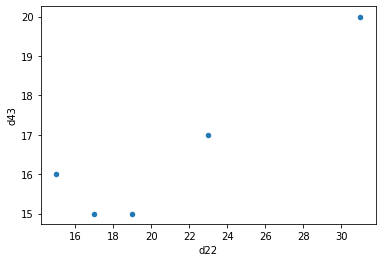

In [176]:
df[['d43','d22']].plot(kind='scatter',x='d22',y='d43')

There doesn't appear to be much relation and there appears to be an outlier

b. Compute the least-squares regression line relating the porosity at 43 days to that at 22 days, and give a measure of the strength of this relation.

In [177]:
lm = sm.OLS(df['d43'],df[['constant','d22']]).fit()
lm.summary()

/home/adgb/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    d43   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     15.43
Date:                Sun, 24 May 2020   Prob (F-statistic):             0.0294
Time:                        18:05:56   Log-Likelihood:                -5.6451
No. Observations:                   5   AIC:                             15.29
Df Residuals:                       3   BIC:                             14.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant      10.3000      1.661      6.201      0.008       5.014      15.586
d22            0.3000      0.076      3.928      0.029       0.057       0.543
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.100
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.309
Skew:                           0.344   Prob(JB):                        0.857
Kurtosis:                       1.994   Cond. No.                         83.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There is a strong positive relation according to the linear model

c. Is knowing the porosity at 22 days useful for predicting it at 43 days? Perform an appropriate statistical test to answer this question.

$H_0: \beta = 0$ Given a p value of 0.029 we can reject the null hypothesis. There appears to be a positive relation.

d. Looking at the whole set of data, do you think that the depth below the surface affects the outcome? Give reasons for your answer.

In [180]:
df.columns

Index(['d22', 'd29', 'd36', 'd43', 'constant'], dtype='object')

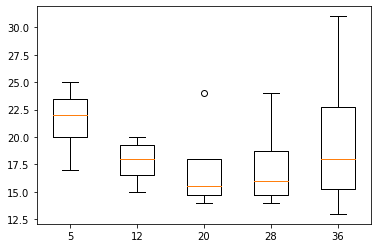

In [193]:
plt.boxplot(df[['d22','d29','d36','d43']],
            labels=df['depth']);

It looks like the variability increases as the depth increases. The percentage of oxigen decreases at 20cm  and increases at lower and larger depths.

e. Assuming that the depth below the surface does not affect the outcome, investigate the overall relation between the outcome and the time after sowing. 

In [199]:
df_long = pd.melt(df, id_vars=['depth'],value_vars=['d22','d29','d36','d43'])
df_long.sample(5)

,depth,variable,value
4,36,d22,31
15,5,d43,17
17,20,d43,16
0,5,d22,23
10,5,d36,21


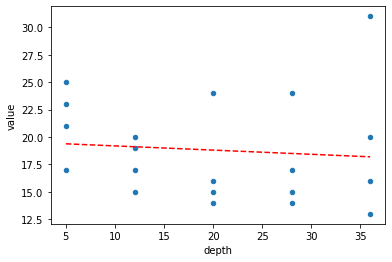

In [203]:
df_long['constant'] = 1.0
lm = sm.OLS(df_long['value'],df_long[['constant','depth']]).fit()

x = np.linspace(df_long['depth'].min(),df_long['depth'].max())
y = x * lm.params['depth'] + lm.params['constant']

df_long[['depth','value']].plot(kind='scatter',x='depth',y='value')
plt.plot(x,y,color='r',ls='--')

In [204]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.046
Method:                 Least Squares   F-statistic:                    0.1560
Date:                Sun, 24 May 2020   Prob (F-statistic):              0.698
Time:                        18:40:29   Log-Likelihood:                -58.623
No. Observations:                  20   AIC:                             121.2
Df Residuals:                      18   BIC:                             123.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant      19.5731      2.231      8.775      0.000      14.887      24.259
depth         -0.0383      0.097     -0.395      0.698      -0.242       0.165
==============================================================================
Omnibus:                        7.030   Durbin-Watson:                   1.251
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                4.633
Skew:                           1.109   Prob(JB):                       0.0986
Kurtosis:                       3.797   Cond. No.                         48.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There isn't a strong relation between the time after sowing and the outcome. There is a very small negative relation and the model only explains 0.9% of the variability.

### Problem 7

The Mooney Problem Checklist (MPCL) comprises 330 items classified into 11 problem areas, and highlights the nature of personal problems and their relation to self-esteem. In a study by Harper & Marshall (1991), the MPCL was administered to 201 adolescents (101 girls and 100 boys) from four secondary co- educational schools in the Sydney metropolitan area, and the following average scores were obtained. 

In [205]:
mpcl_problem_are = 'Health & physical development|Finance, living conditions, employment|Social & recreational activities|Courtship, sex & marriage|Social psychological relationships|Personal psychological relationships|Morals & religion|Home & family|The future, vocational & employment|Adjustment to school work|Curriculum & teaching procedures'.split('|')
girls = [4.27, 4.72, 3.78, 4.57, 5.81, 5.09, 3.89, 4.09, 3.54, 5.60, 4.52]
boys = [2.83, 3.56, 3.12, 3.27, 4.01, 3.35, 3.07, 2.95, 2.93, 5.70, 4.66]

df = pd.DataFrame({'mpcl_problem_area':mpcl_problem_are,
                   'girls':girls, 'boys':boys, 'constant':np.ones(len(girls))})
df

,mpcl_problem_area,girls,boys,constant
0,Health & physical development,4.27,2.83,1.0
1,"Finance, living conditions, employment",4.72,3.56,1.0
2,Social & recreational activities,3.78,3.12,1.0
3,"Courtship, sex & marriage",4.57,3.27,1.0
4,Social psychological relationships,5.81,4.01,1.0
5,Personal psychological relationships,5.09,3.35,1.0
6,Morals & religion,3.89,3.07,1.0
7,Home & family,4.09,2.95,1.0
8,"The future, vocational & employment",3.54,2.93,1.0
9,Adjustment to school work,5.60,5.70,1.0


a. Compute the correlation coefficient between the scores for the girls and those for the boys.

In [225]:
lm_b = sm.OLS(df['girls'],df[['constant','boys']]).fit()

In [226]:
print(f'Correlation of coefficient = {math.sqrt(lm_b.rsquared):.3f}')

Correlation of coefficient = 0.687


b. Compute the goodness-of-fit of the relation. Describe how well the linear relation fits the data.

In [227]:
print(f'R squared = {lm_b.rsquared:.3f}')

R squared = 0.472


47% of the variation in the girls scores can be explained by the boys score

c. Display the data in a scatter plot, with the girls’ scores plotted on the horizontal axis.

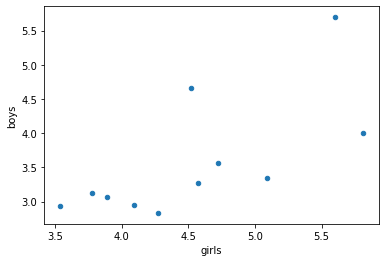

In [214]:
df[['girls','boys']].plot(kind='scatter',x='girls',y='boys')

d. Fit the least-squares line to the scatter plot

In [229]:
lm_g = sm.OLS(df['boys'],df[['constant','girls']]).fit()

constant   -0.186676
girls       0.832066
dtype: float64


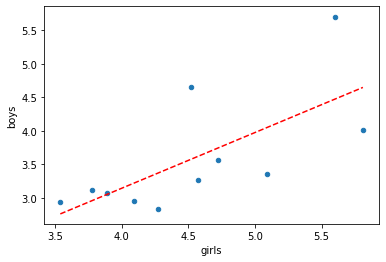

In [230]:
x = np.linspace(df.girls.min(),df.girls.max())
y = x*lm_g.params['girls'] + lm_g.params['constant']
df[['girls','boys']].plot(kind='scatter',x='girls',y='boys')
plt.plot(x,y,color='r',ls='--')
print(lm_g.params)

e. If you had plotted the boys’ scores on the horizontal axis and fitted the least-squares line to this scatter plot, would you get the same fitted relation? Explain. If not, discuss which line is more appropriate? 

In [233]:
lm_g.params, lm_g.rsquared

(constant   -0.186676
 girls       0.832066
 dtype: float64,
 0.4717623640234554)

In [234]:
lm_b.params, lm_b.rsquared

(constant    2.501159
 boys        0.566977
 dtype: float64,
 0.4717623640234555)

The equation is different but the coefficient of correlation and $r^2$ is equal. Given the information provided it is impossible to know which line would be more appropriate.

### Problem 8

Dr M. Hills from the Open University in England collected the following chest, waist and hips measurements, in inches, for 10 men and 10 women (cited on page 62 of Hand et al, 1994). (The men and the women are not identified.)

In [238]:
chest = [34, 37, 38, 36, 38, 43, 40, 38, 40, 41, 36, 36, 34, 33, 36, 37, 34, 36, 38, 35]
waist = [30, 32, 30, 33, 29, 32, 33, 30, 30, 32, 24, 25, 24, 22, 26, 26, 25, 26, 28, 23] 
hips = [32, 37, 36, 39, 33, 38, 42, 40, 37, 39, 35, 37, 37, 34, 38, 37, 38, 37, 40, 35]

df = pd.DataFrame({'chest':chest,'waist':waist,'hip':hips,
                   'constant':np.ones(len(chest))})
df.index.name = 'individual'
df

,chest,waist,hip,constant
individual,,,,
0,34,30,32,1.0
1,37,32,37,1.0
2,38,30,36,1.0
3,36,33,39,1.0
4,38,29,33,1.0
5,43,32,38,1.0
6,40,33,42,1.0
7,38,30,40,1.0
8,40,30,37,1.0


 If you know the sum of the waist and hips measurements for a person, how well can you predict their chest measurement? Answer this question with the given data by doing an appropriate linear regression analysis. 

In [239]:
df['waist_hip_sum'] = df['waist'] + df['hip']

In [241]:
lm = sm.OLS(df['chest'],df[['constant','waist_hip_sum']]).fit()

In [242]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  chest   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     19.22
Date:                Sun, 24 May 2020   Prob (F-statistic):           0.000358
Time:                        22:27:25   Log-Likelihood:                -39.519
No. Observations:                  20   AIC:                             83.04
Df Residuals:                      18   BIC:                             85.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
constant         13.2216      5.439      2.431      0.026       1.794      24.649
waist_hip_sum     0.3655      0.083      4.384      0.000       0.190       0.541
==============================================================================
Omnibus:                        1.014   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.602   Jarque-Bera (JB):                0.337
Skew:                           0.314   Prob(JB):                        0.845
Kurtosis:                       3.101   Cond. No.                         863.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model can only explain 51% of the variation in chest measures. A test for significance of $\beta$ allows us to reject the null hypothesis. Pointing to a real correlation between the variables.

### Problem 9

Using the data from Figure 9.16, investigate the relation between the murder rate and the motor vehicle theft rate. Choose the murder rate as the outcome variable. Should the value for the District of Columbia be omitted before fitting the regression line? Explain. 

### Problem 10

Gilchrist (1984, page 5) gives the following distances by road and the corresponding distances as the crow flies (each measured in miles) between 20 pairs of points in Sheffield, England. What is the relationship between the two variables? How well can the road distance be predicted from the distance as the crow flies? 

In [259]:
arr1 = np.array([[10.7, 9.5], [6.5, 5.0], [29.4, 23.0], [17.2, 15.2], [18.4, 11.4], [19.7, 11.8], [16.6, 12.1], [29.0, 22.0], [40.5, 28.2], [14.2, 12.1]])
arr2 = np.array([[11.7, 9.8], [25.6, 19.0], [16.3, 14.6], [9.5, 8.3], [28.8, 21.6], [31.2, 26.5], [6.5, 4.8], [25.7, 21.7], [26.5, 18.0], [33.1, 28.0]])
df = pd.DataFrame(np.concatenate([arr1,arr2]),columns=['road_distance','direct_distance'])
df['constant']=1.0
df

,road_distance,direct_distance,constant
0,10.7,9.5,1.0
1,6.5,5.0,1.0
2,29.4,23.0,1.0
3,17.2,15.2,1.0
4,18.4,11.4,1.0
5,19.7,11.8,1.0
6,16.6,12.1,1.0
7,29.0,22.0,1.0
8,40.5,28.2,1.0
9,14.2,12.1,1.0


In [260]:
lm = sm.OLS(df['road_distance'],df[['constant','direct_distance']]).fit()

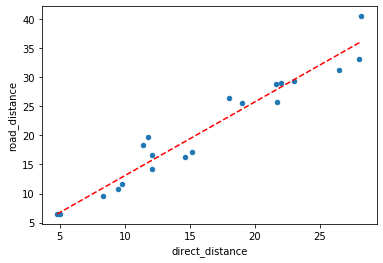

In [263]:
x = np.linspace(df['direct_distance'].min(),df['direct_distance'].max())
y = x*lm.params['direct_distance'] + lm.params['constant']

df[['road_distance','direct_distance']].plot(kind='scatter',x='direct_distance',y='road_distance')
plt.plot(x,y,color='r',ls='--')

In [262]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          road_distance   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     277.7
Date:                Sun, 24 May 2020   Prob (F-statistic):           2.19e-12
Time:                        23:16:22   Log-Likelihood:                -45.134
No. Observations:                  20   AIC:                             94.27
Df Residuals:                      18   BIC:                             96.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
constant            0.3791      1.344      0.282      0.781      -2.445       3.203
direct_distance     1.2694      0.076     16.665      0.000       1.109       1.429
==============================================================================
Omnibus:                        2.132   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.344   Jarque-Bera (JB):                1.705
Skew:                           0.582   Prob(JB):                        0.426
Kurtosis:                       2.167   Cond. No.                         43.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The road distance can be predicted by the flying distance. One mile change in flying distance accounts for 1.26 miles change in road distance.

Flying distance explains 90% of the variation in road distance and when testing whether the change explained is due to change, we can reject the null hypothesis with a p value close to zero.